In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("/home/shree_xd/Downloads/Parkinsons/labelled.data")

# EDA

In [5]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

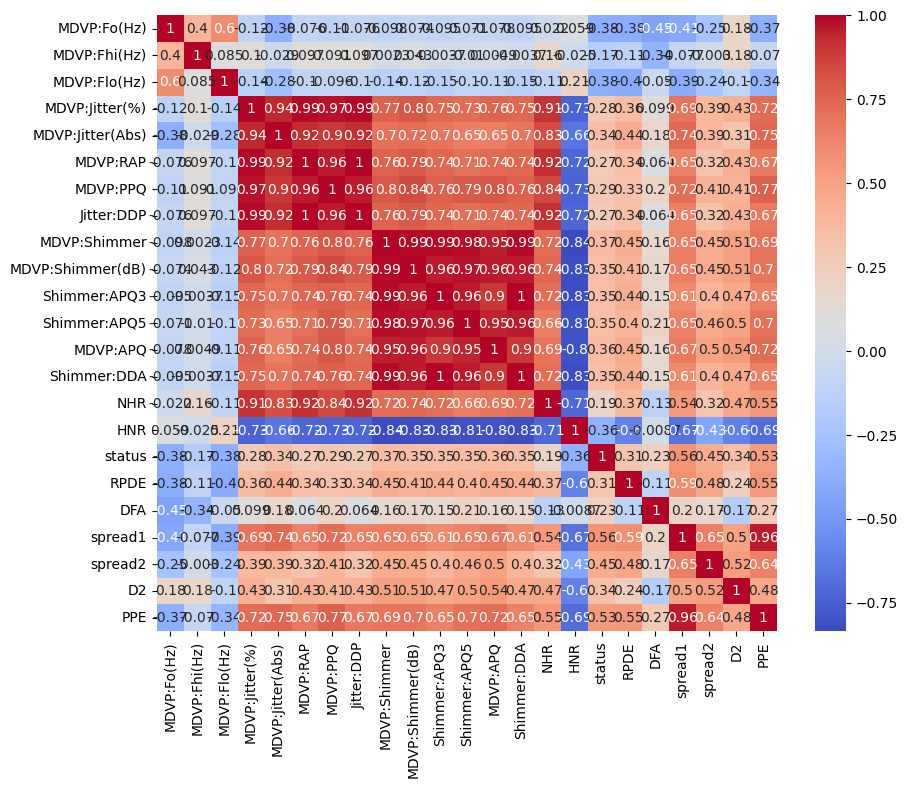

In [6]:
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

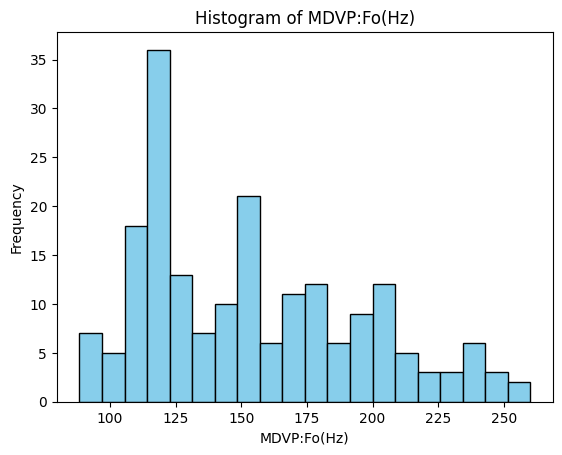

In [7]:
# Histogram for MDVP:Fo(Hz)
plt.hist(df['MDVP:Fo(Hz)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('Frequency')
plt.title('Histogram of MDVP:Fo(Hz)')
plt.show()


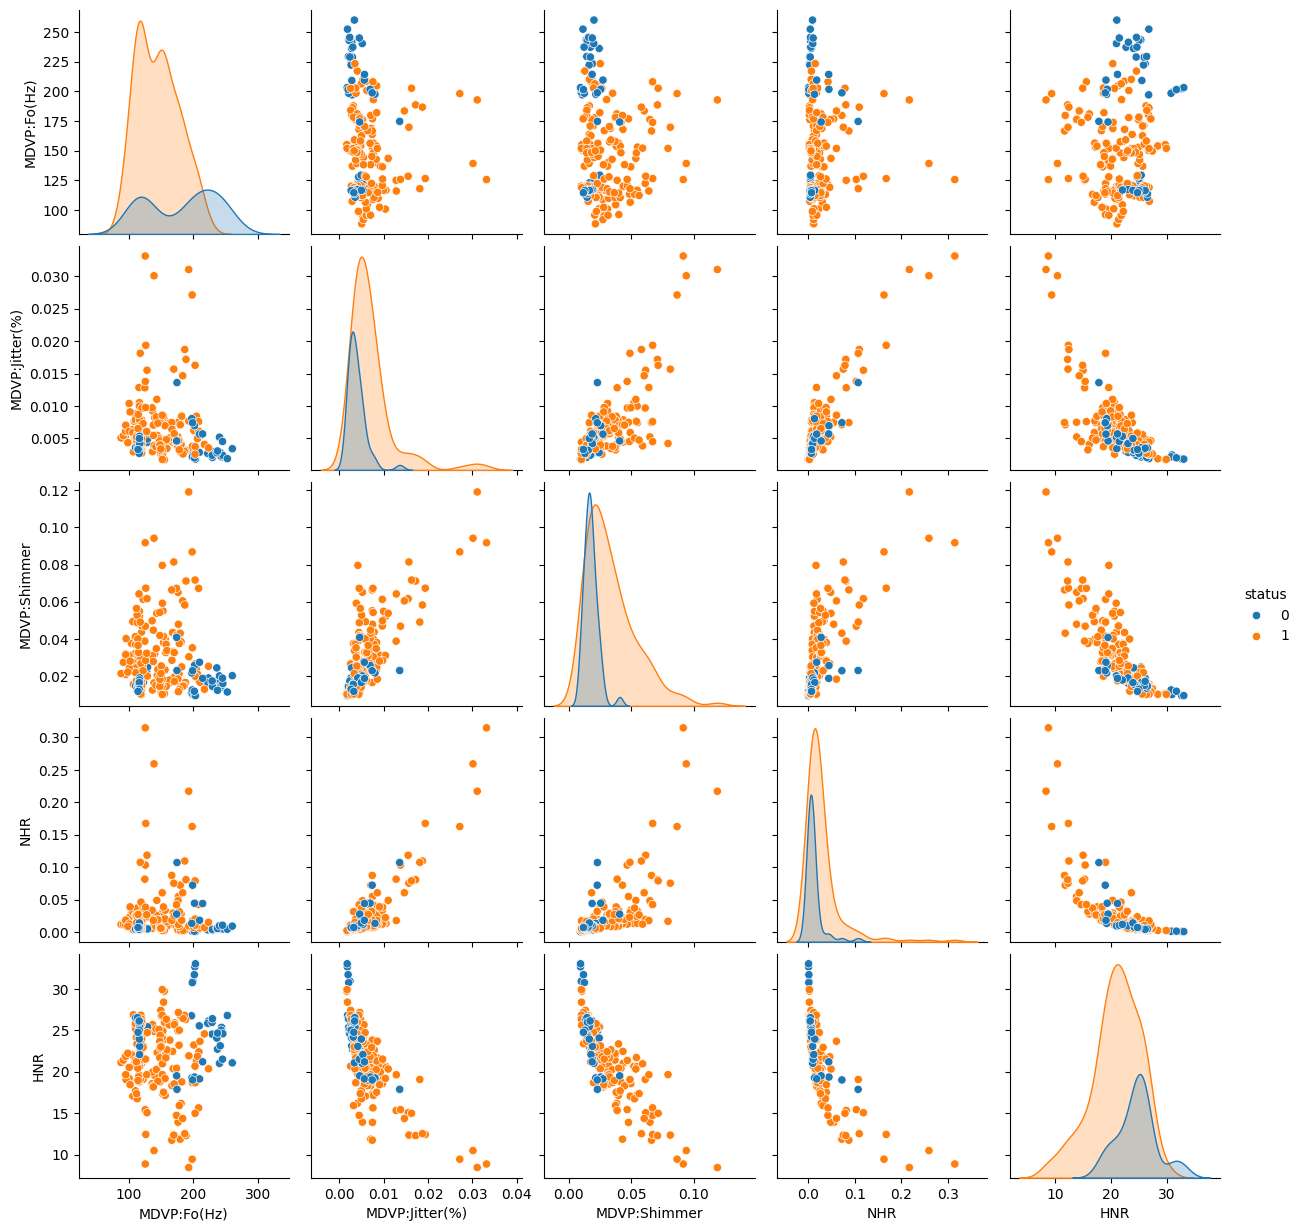

In [8]:
# Pairplot
sns.pairplot(df[['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'HNR', 'status']], hue='status', diag_kind='kde')
plt.show()


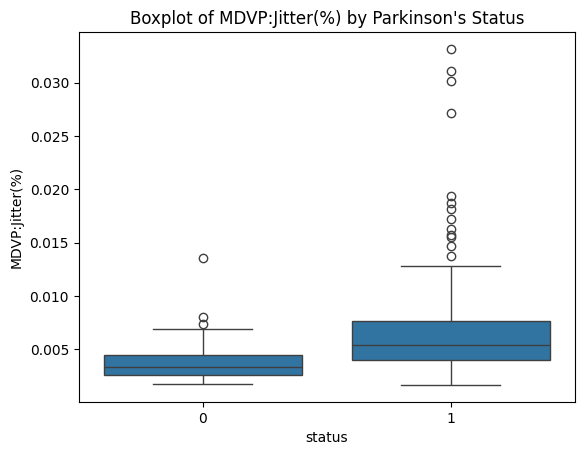

In [9]:
# Boxplot for MDVP:Jitter(%)
sns.boxplot(x='status', y='MDVP:Jitter(%)', data=df)
plt.title('Boxplot of MDVP:Jitter(%) by Parkinson\'s Status')
plt.show()


/tmp/ipykernel_19109/708578695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y='MDVP:Fo(Hz)', data=df, palette='Set2')


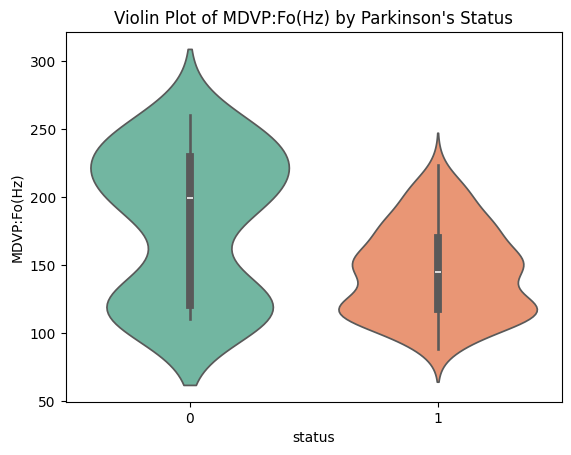

In [56]:
# Violin plot for MDVP:Fo(Hz) by Parkinson's Status
sns.violinplot(x='status', y='MDVP:Fo(Hz)', data=df, palette='Set2')
plt.title('Violin Plot of MDVP:Fo(Hz) by Parkinson\'s Status')
plt.show()


# Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler
y = df['status']
df = df.drop('status', axis=1)  
numeric_df = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
df = pd.DataFrame(scaled_data, columns=numeric_df.columns)
df.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

outliers = (df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))

outlier_counts = outliers.sum()

print("Outlier counts for each column:")
print(outlier_counts)

rows_with_outliers = df[outliers.any(axis=1)]
print("Rows with outliers:")
print(rows_with_outliers)

Outlier counts for each column:
MDVP:Fo(Hz)          0
MDVP:Fhi(Hz)        11
MDVP:Flo(Hz)         9
MDVP:Jitter(%)      14
MDVP:Jitter(Abs)     7
MDVP:RAP            14
MDVP:PPQ            15
Jitter:DDP          14
MDVP:Shimmer         8
MDVP:Shimmer(dB)    10
Shimmer:APQ3         6
Shimmer:APQ5        13
MDVP:APQ            12
Shimmer:DDA          6
NHR                 19
HNR                  3
RPDE                 0
DFA                  0
spread1              4
spread2              2
D2                   1
PPE                  5
dtype: int64
Rows with outliers:
     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
1      -0.770972     -0.530974     -0.057721        0.715418   
2      -0.909476     -0.723168     -0.109875        0.884991   
4      -0.925657     -0.606245     -0.130608        1.368893   
5      -0.815735     -0.722609     -0.058458        0.715418   
17      0.352423      0.384367     -0.938077        0.198429   
18     -0.028647     -0.233144     -1.098871 

# Training

# 1.Random Forest

Accuracy: 0.9152542372881356
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.91      0.98      0.95        44

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.88        59
weighted avg       0.92      0.92      0.91        59

Confusion Matrix:


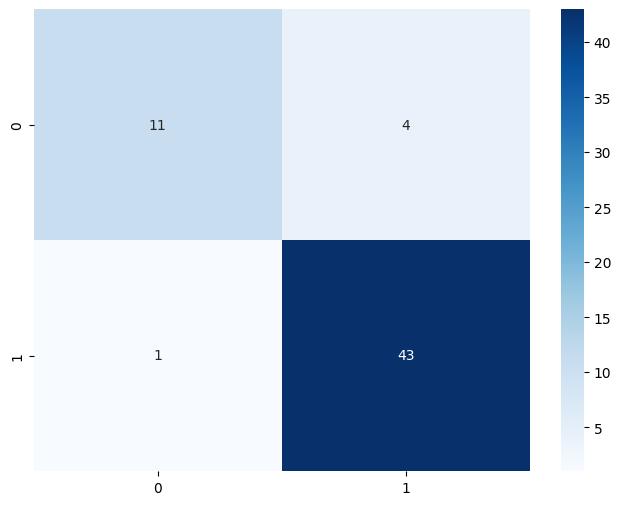

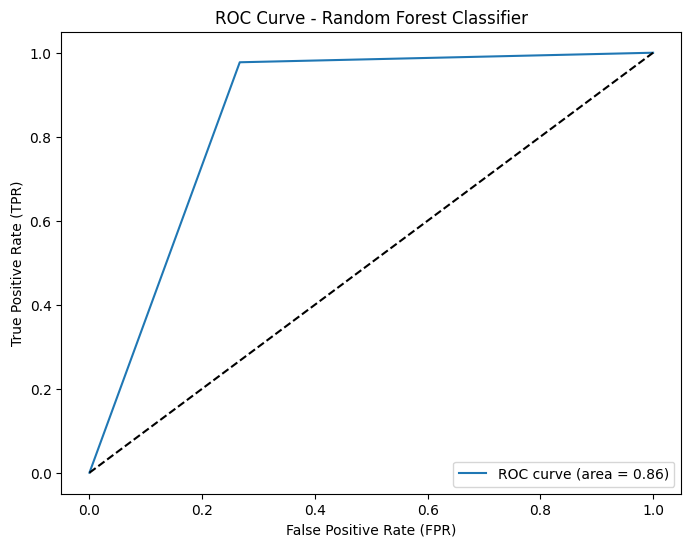

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

rf_model = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

best_params_rf = rf_grid_search.best_params_

best_rf_model = RandomForestClassifier(**best_params_rf)
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# 2.Gradient Boosting

Accuracy: 0.9322033898305084
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59

Confusion Matrix:


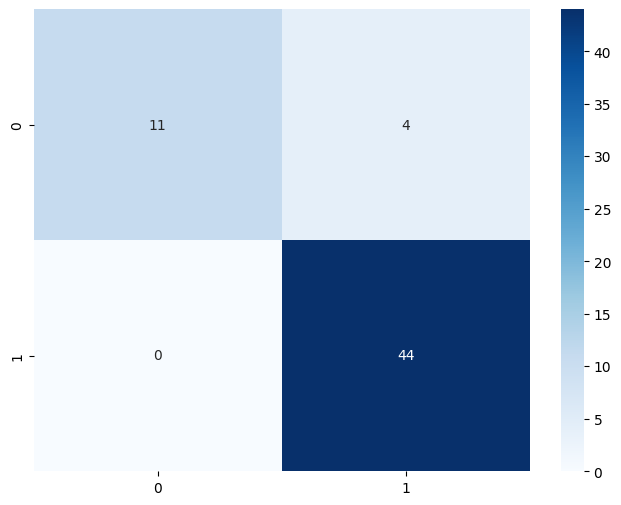

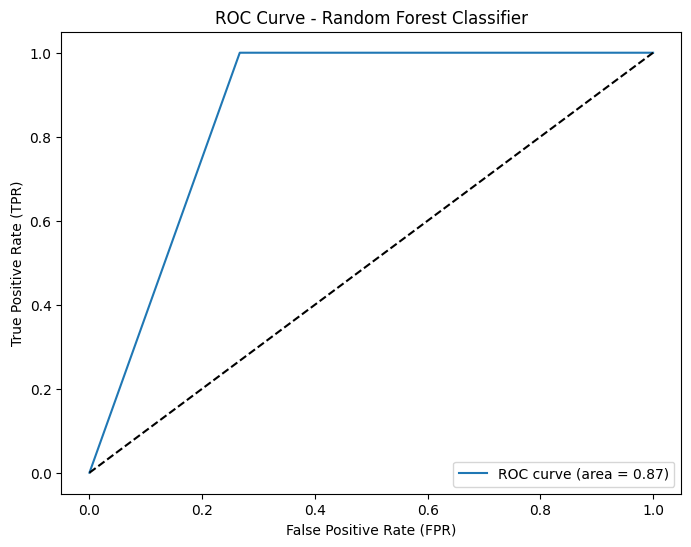

In [13]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

model = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 6, 9], 
    'learning_rate': [0.1, 0.01, 0.001],  
    'subsample': [0.8, 0.9, 1.0],  
    'colsample_bytree': [0.8, 0.9, 1.0],  
}

gb_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

best_params_gb = gb_grid_search.best_params_

best_gb_model = xgb.XGBClassifier(**best_params_gb)
best_gb_model.fit(X_train, y_train)

y_pred = best_gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random Guess Line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


# 3.SVM

Accuracy: 0.9491525423728814
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59

Confusion Matrix:


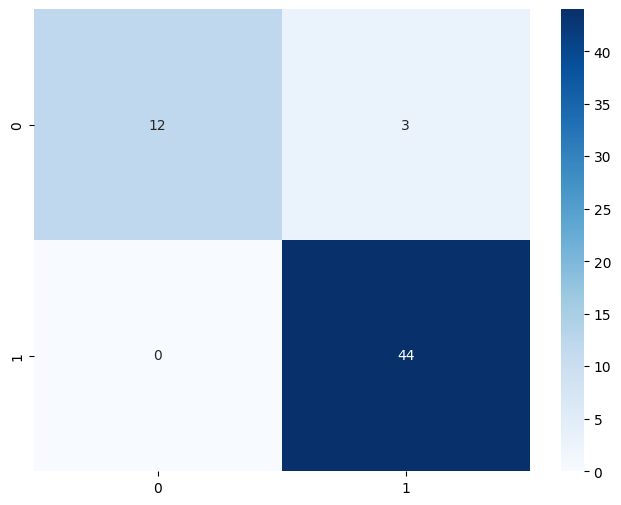

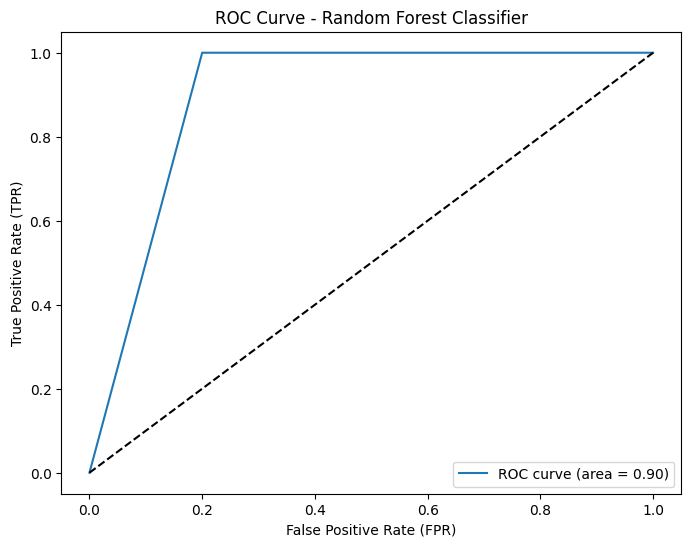

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'poly', 'rbf'],  
    'gamma': ['scale', 'auto'],  
}

svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

best_params_svm = svm_grid_search.best_params_

best_svm_model = SVC(**best_params_svm)
best_svm_model.fit(X_train, y_train)

y_pred = best_svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random Guess Line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


# 4.Logistic Regression

Accuracy: 0.864406779661017
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59

Confusion Matrix:


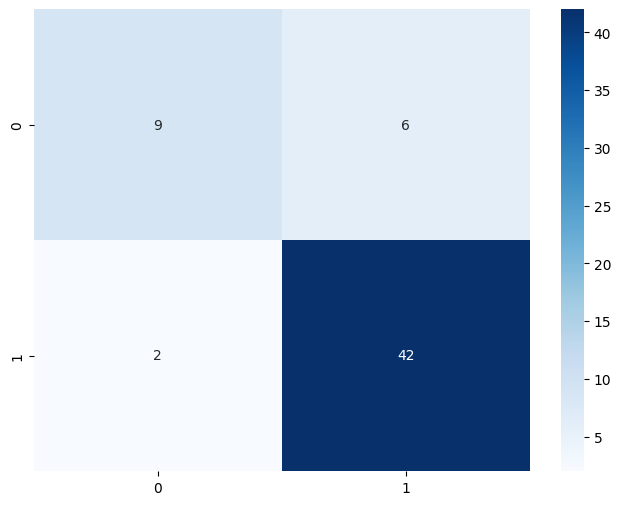

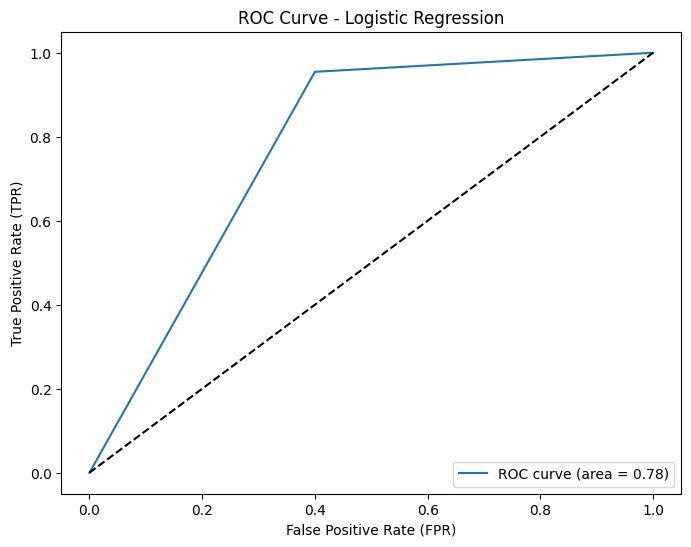

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

X = df  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# 5.Naive Bayes

Accuracy: 0.7627118644067796
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.80      0.63        15
           1       0.92      0.75      0.82        44

    accuracy                           0.76        59
   macro avg       0.72      0.78      0.73        59
weighted avg       0.82      0.76      0.78        59

Confusion Matrix:


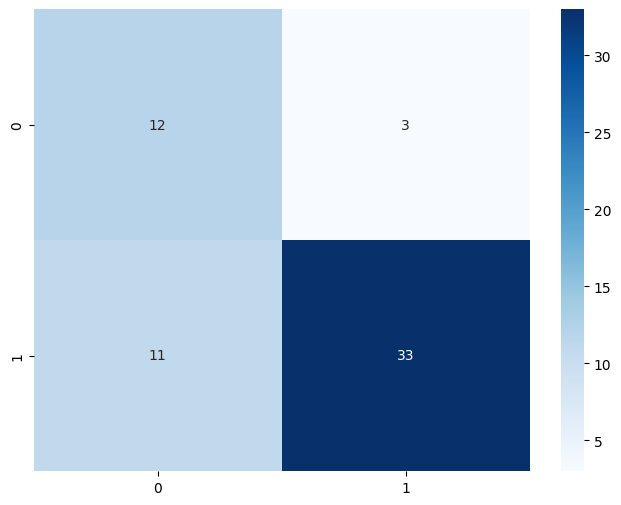

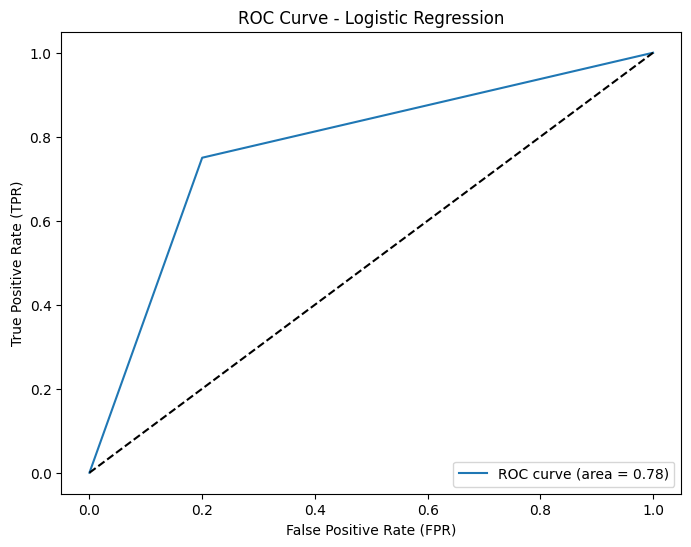

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# 6.KNN

Accuracy: 0.8983050847457628
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59

Confusion Matrix:


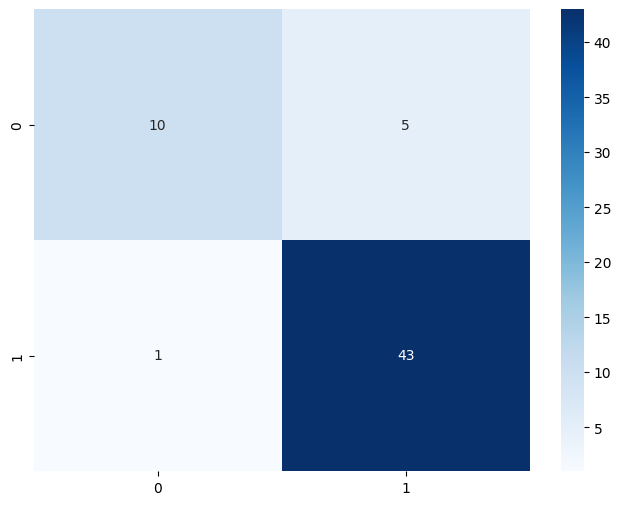

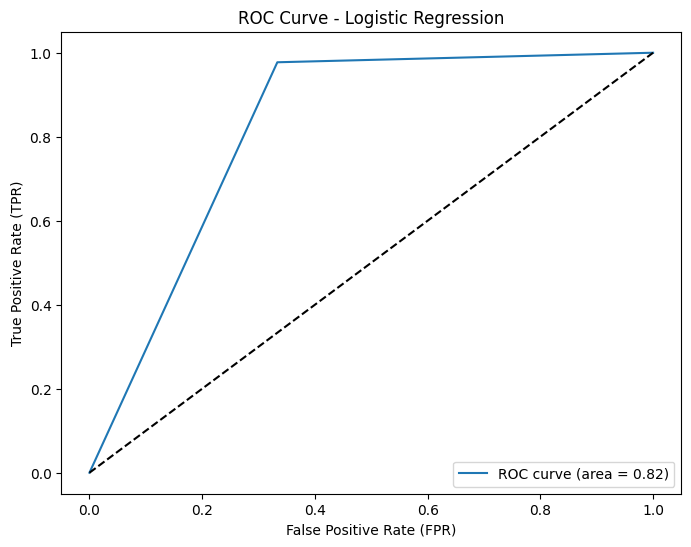

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)  # Example with k=5 neighbors
# You can use GridSearchCV to find the optimal k

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()